# Saving and loading data

In this notebook we will see how to save and load simulated data and device and simulation information. How to save the plots was already shown in notebooks example1_double_quantum_dot.ipynb (how to save CSD plots) and example3_completely_custom_device.ipynb (how to save the plot of the device).

There are lots of different data we deal with during our simulations:
- device geometry and physical properties (e.g. dot locations, mutual capacitance matrices)
- simulation setup (e.g. voltage points actually being simulated, granularity of the plots, which gates were scanned, etc)
- simulated data results (noisy or not): potential values, current values, charge configurations

Here we will see how to save and load all of them.


A quick summary of the topics covered in this notebook:
1. Saving and Loading device information
2. Saving and Loading simulation setup
3. Saving and Loading simulation results (noisy or not)
4. Saving and Loading noisy data: 2 ways (this is a bit less smooth and will be improved in future versions)


## 1. Saving and Loading Device Information

Let's initialize some device of which we want to save the data. We can save it by calling the
method `save_to_json` and giving it the path where we want to save the data, plus filename and .json extension. The data will be saved in a json file.

In [1]:
from qdsim import QDDevice

qddevice = QDDevice()
qddevice.one_dimensional_dots_array(n_dots=6, equal_dots=False, equal_gates=False, crosstalk_strength=0.3)
qddevice.print_device_info()

qddevice.save_to_json(json_file_path='../results/data/qddevice_6dots.json')


Device type: in-line array
Number of dots: 6
Number of gates: 6
Physical dot locations: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]
Dot-dot mutual capacitance matrix:
[[0.12 0.08 0.00 0.00 0.00 0.00]
 [0.08 0.11 0.08 0.00 0.00 0.00]
 [0.00 0.08 0.12 0.08 0.00 0.00]
 [0.00 0.00 0.08 0.12 0.08 0.00]
 [0.00 0.00 0.00 0.08 0.13 0.08]
 [0.00 0.00 0.00 0.00 0.08 0.11]]
Dot-gate mutual capacitance matrix:
[[0.12 0.01 0.00 0.00 0.00 0.00]
 [0.01 0.15 0.02 0.00 0.00 0.00]
 [0.00 0.02 0.10 0.02 0.00 0.00]
 [0.00 0.00 0.02 0.15 0.01 0.00]
 [0.00 0.00 0.00 0.01 0.11 0.02]
 [0.00 0.00 0.00 0.00 0.02 0.14]]


Here we instantiate a new empty object of the class QDDevice. If we print the device information we see that it is empty.

In [2]:
# Now let's load the device from the json file
loaded_qddevice = QDDevice()
loaded_qddevice.print_device_info()

Device type: None
Number of dots: None
Number of gates: None
Physical dot locations: None
Dot-dot mutual capacitance matrix:
None
Dot-gate mutual capacitance matrix:
None


We then load the device from the json file we saved before and print the device information again. We see that the device was loaded correctly.

In [3]:
loaded_qddevice.load_from_json(json_file_path='../results/data/qddevice_6dots.json')
loaded_qddevice.print_device_info()

Device type: in-line array
Number of dots: 6
Number of gates: 6
Physical dot locations: [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]
Dot-dot mutual capacitance matrix:
[[0.12 0.08 0.00 0.00 0.00 0.00]
 [0.08 0.11 0.08 0.00 0.00 0.00]
 [0.00 0.08 0.12 0.08 0.00 0.00]
 [0.00 0.00 0.08 0.12 0.08 0.00]
 [0.00 0.00 0.00 0.08 0.13 0.08]
 [0.00 0.00 0.00 0.00 0.08 0.11]]
Dot-gate mutual capacitance matrix:
[[0.12 0.01 0.00 0.00 0.00 0.00]
 [0.01 0.15 0.02 0.00 0.00 0.00]
 [0.00 0.02 0.10 0.02 0.00 0.00]
 [0.00 0.00 0.02 0.15 0.01 0.00]
 [0.00 0.00 0.00 0.01 0.11 0.02]
 [0.00 0.00 0.00 0.00 0.02 0.14]]


## 2. Saving and Loading Simulation Setup

It is possible to save the simulation setup information, such as the sensor locations, the scanning gate indexes, the voltage ranges, etc. Similarly to the device information,  we can save it by calling the method `save_to_json` and giving it the path where we want to save the data, plus filename and .json extension. The data will be saved in a json file. By default however this method does not save the simulation results (e.g. charge configurations), only the setup information.

In [4]:
from qdsim import QDSimulator

# Let's initialize a simulator
qdsimulator = QDSimulator('Holes')

# Set the sensor locations
qdsimulator.set_sensor_locations(sensor_locations=[(0.5, 0.5)])

# Set the simulation parameter and run the simulation
qdsimulator.simulate_charge_stability_diagram(qd_device=qddevice, scanning_gate_indexes=[0, 1], n_points_per_axis=30, v_range_x=[-20, 5], v_range_y=[-20, 5], solver='MOSEK' )

# Save the simulation setup
qdsimulator.save_to_json('../results/data/qdsimulator.json')

100%|██████████| 1/1 [00:00<00:00, 235.03it/s]


### Now let's load the simulation setup from the json file


Here we create a new empty QDSimulator object to show that the simulation setup was loaded correctly using the method `load_from_json`. After loading the simulation setup, we print the simulation information using the method `print_simulation_info`. This method prints the simulation information. If we want to print the device information as well, we can set the parameter `print_device_info` to `True`.


In [7]:
# Create a new simulator
loaded_simulator = QDSimulator()

# Load the simulation setup
loaded_simulator.load_from_json('../results/data/qdsimulator.json')

# Print the simulation info, including the device info (as seen in the previous section)
loaded_simulator.print_simulation_info(print_device_info=True)


Device type: in-line array
Number of dots: 6
Number of gates: 6
Physical dot locations: [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0]]
Dot-dot mutual capacitance matrix:
[[0.12 0.08 0.00 0.00 0.00 0.00]
 [0.08 0.11 0.08 0.00 0.00 0.00]
 [0.00 0.08 0.12 0.08 0.00 0.00]
 [0.00 0.00 0.08 0.12 0.08 0.00]
 [0.00 0.00 0.00 0.08 0.13 0.08]
 [0.00 0.00 0.00 0.00 0.08 0.11]]
Dot-gate mutual capacitance matrix:
[[0.12 0.01 0.00 0.00 0.00 0.00]
 [0.01 0.15 0.02 0.00 0.00 0.00]
 [0.00 0.02 0.10 0.02 0.00 0.00]
 [0.00 0.00 0.02 0.15 0.01 0.00]
 [0.00 0.00 0.00 0.01 0.11 0.02]
 [0.00 0.00 0.00 0.00 0.02 0.14]]
Simulation setup:
Physics to be simulated: Holes
Number of voltage points per axis: 30
Number of probe points: 900
Variable gate index 1: 0
Variable gate index 2: 1
Voltage ranges: [[-20, 5], [-20, 5]]
Gate voltages: [None, None, 0, 0, 0, 0]
Sensor locations: [[0.5, 0.5]]


## 3. Saving and Loading Simulation Results

The json file saved in the previous section does not contain the simulation results, only the setup information. If we want to save the simulation results, we can use the method `save_results_to_npy` and give it the path where we want to save the data. The data will be saved in a npy file. This method saves the voltage and occupation array, the current array, and the potential array. This division in saving options is useful because the simulation results can be very large and we may not want to save all of them all the time. The method `save_results_to_npy` does not save the device information, only the simulation results. If we want to save the device information as well, we can use the method `save_to_json` as shown in the previous section.

We save the simulation results in npy files because they are faster to load than json files. The method `load_from_json` does not load the simulation results, only the setup information. To load the simulation results, we can use the method `load_results_from_npy` and give it the path where the data is saved. The data will be loaded from the npy file. The method `load_results_from_npy` loads the voltage and occupation array, the current array, and the potential array. The method `load_results_from_npy` does not load the device information, only the simulation results. If we want to load the device information as well, we can use the method `load_from_json` as shown in the previous section.

In [11]:
# Save the simulation results to different npy files
qdsimulator.save_results_to_npy(save_voltage_occupation_data_to_filepath='../results/data/voltage_occupation_data.npy', save_current_data_to_filepath='../results/data/current_data.npy', save_sensing_data_to_filepath='../results/data/sensing_data.npy')

In [8]:
# Check that the loaded_simulator is empty
print(loaded_simulator.voltage_array)
print(loaded_simulator.current_array)
print(loaded_simulator.potential_array)
print(loaded_simulator.voltage_occupation_data)
print(loaded_simulator.occupation_array)

# Now let's load the results from the npy files
loaded_simulator.load_results_from_npy(voltage_occupation_data_filepath='../results/data/voltage_occupation_data.npy', current_data_filepath='../results/data/current_data.npy', sensing_data_filepath='../results/data/sensing_data.npy')

# Check that the loaded_simulator is not empty anymore
print('Loaded data:')
print(loaded_simulator.voltage_array)
print(loaded_simulator.current_array)
print(loaded_simulator.potential_array)
print(loaded_simulator.voltage_occupation_data)
print(loaded_simulator.occupation_array)


None
None
None
None
None
Loaded data:
[[[-20.         -20.           0.           0.           0.
     0.        ]
  [-20.         -19.13793103   0.           0.           0.
     0.        ]
  [-20.         -18.27586207   0.           0.           0.
     0.        ]
  ...
  [-20.           3.27586207   0.           0.           0.
     0.        ]
  [-20.           4.13793103   0.           0.           0.
     0.        ]
  [-20.           5.           0.           0.           0.
     0.        ]]

 [[-19.13793103 -20.           0.           0.           0.
     0.        ]
  [-19.13793103 -19.13793103   0.           0.           0.
     0.        ]
  [-19.13793103 -18.27586207   0.           0.           0.
     0.        ]
  ...
  [-19.13793103   3.27586207   0.           0.           0.
     0.        ]
  [-19.13793103   4.13793103   0.           0.           0.
     0.        ]
  [-19.13793103   5.           0.           0.           0.
     0.        ]]

 [[-18.27586207 -20.  

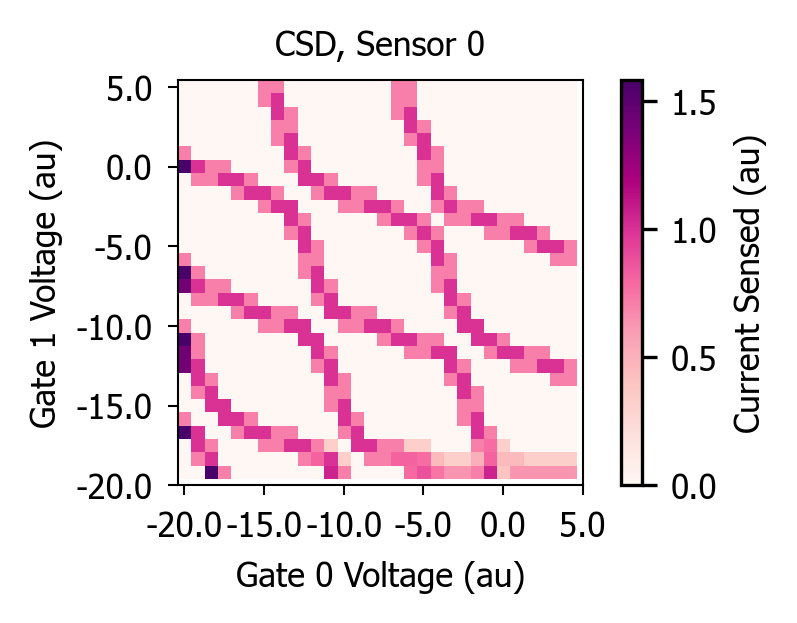

In [9]:
# Plot the charge stability diagram
loaded_simulator.plot_charge_stability_diagrams(plot_potential=False)

## 4. Saving Noisy Data

In order to save the noisy data, we need to pass through the plotting function first. The plotting functions are the ones that add the noise to the data, and after the noise is added, we can save the resulting data (either the current_array if `plot_potential=False`  or the potential_array if `plot_potential=True`) to npy files using the `save_noisy_npy_data_to_filepath` method. Notice that in the current version of the package this data cannot be loaded directly from the npy file into the `QDSimulator` object. Users can deal with noisy data in 2 ways:
1. Just save the noiseless data to npy files using the build-in methods shown in the section above and add the noise again using the plotting functions.
2. Save the noisy data to npy files and load them using the numpy library and imshow function to manually deal with the data.

Further versions of the package will likely improve this feature.

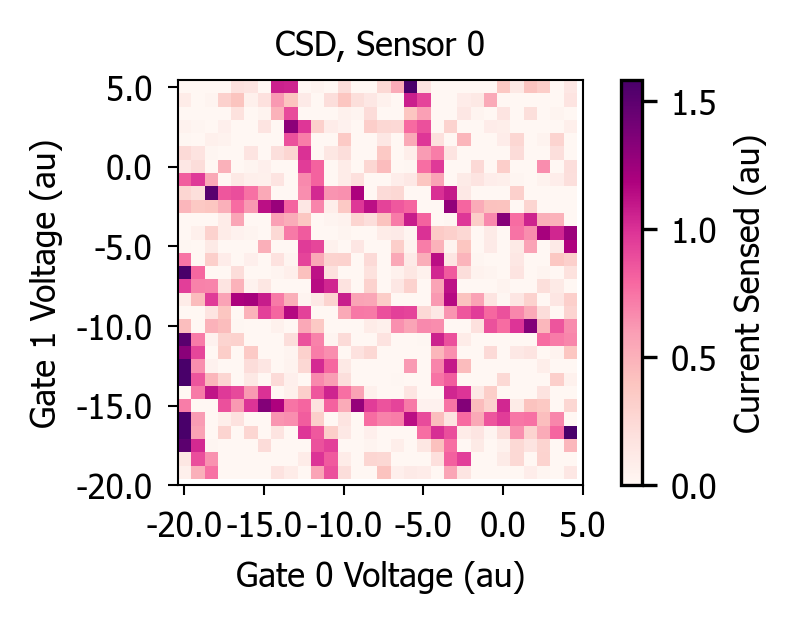

In [5]:
# Add noise to the data using the plotting function and save to npy files
qdsimulator.plot_charge_stability_diagrams(plot_potential=False, gaussian_noise=True, save_noisy_npy_data_to_filepath='../results/data/dots_noisy_current_data.npy')

### 4.1 Loading the noiseless data and adding noise manually

We already loaded the noiseless data in the loaded_simulator object. Here we use the plotting function to add noise to the data and plot it. Since the noise is simulated by adding random values, it will be different from the noise added before, but overall the data should look similar.


In [10]:
# Plot the loaded current data and add some gaussian noise
loaded_simulator.plot_charge_stability_diagrams(plot_potential=False, gaussian_noise=True)

### 4.1 Loading the noisy data and plotting it using numpy and imshow

This is not the most user-friendly way to deal with them, but it is good enough for those looking to generate a lot of noisy data for creating dataset.
We will improve this feature in the future.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Replace 'your_file.npy' with the path to your .npy file
data_current = np.load('../results/data/dots_noisy_current_data.npy')

# Plotting the data
plt.imshow(data_current, cmap='RdPu_r')
plt.colorbar()  # Optional: adds a colorbar to help interpret the values
plt.show()